In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import preprocess
import model

Importing data

In [2]:
data = preprocess.get_data()

Correlation Between Values

In [3]:
data.corr()

,users,sessions,newusers
users,1.000000,0.955080,0.665614
sessions,0.955080,1.000000,0.691444
newusers,0.665614,0.691444,1.000000


<AxesSubplot:>

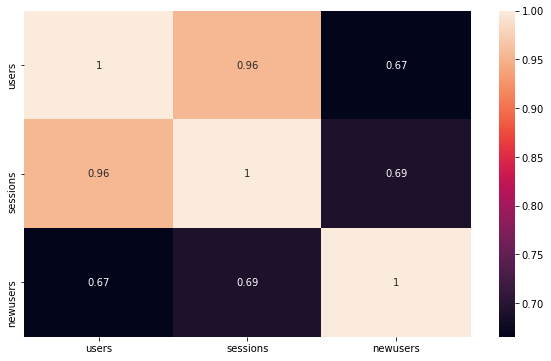

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, )

In [5]:
data.head()

,users,sessions,newusers
time,,,
2018-12-22 09:00:00,64,60,5
2018-12-22 10:00:00,79,84,8
2018-12-22 11:00:00,97,102,22
2018-12-22 12:00:00,107,102,13
2018-12-22 13:00:00,105,117,10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2018-12-22 09:00:00 to 2018-12-29 09:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   users     169 non-null    int64
 1   sessions  169 non-null    int64
 2   newusers  169 non-null    int64
dtypes: int64(3)
memory usage: 5.3 KB


Plotting user count change over time

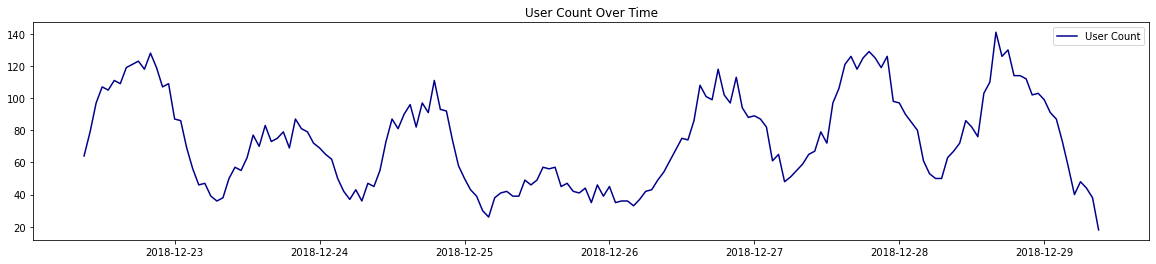

In [7]:
plt.figure(figsize=(20,4))
plt.title('User Count Over Time')
plt.plot(data.users, color='darkblue', label='User Count')
plt.legend(loc='best')

Training a Seq2Seq Model

In [8]:
INPUT_SEQ_LEN = 24
OUTPUT_SEQ_LEN = 6

In [9]:
input_seq, output_seq = preprocess.generate_train_sequences(data.values, INPUT_SEQ_LEN, OUTPUT_SEQ_LEN)

In [10]:
input_seq.shape

(139, 24, 3)

In [11]:
output_seq.shape

(139, 6, 3)

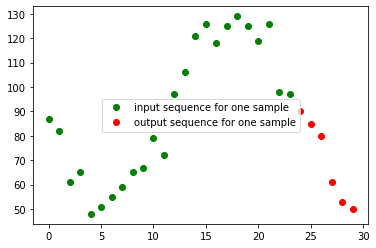

In [12]:
l1, = plt.plot(range(24), input_seq[1].T[0], 'go', label = 'input sequence for one sample')
l2, = plt.plot(range(24,30), output_seq[1].T[0], 'ro', label = 'output sequence for one sample')
plt.legend(handles = [l1,l2], loc = 'best')
plt.show()

In [13]:
train_input_seq, test_input_seq, train_output_seq, test_output_seq = preprocess.create_train_test_data()

In [14]:
print(train_input_seq.shape)
print(train_output_seq.shape)
print(test_input_seq.shape)
print(test_output_seq.shape)

(111, 24, 3)
(111, 6, 3)
(28, 24, 3)
(28, 6, 3)


In [15]:
seq2seq = model.Seq2SeqModel(train_input_seq,train_output_seq)

In [16]:
seq2seq.fit_model()

Epoch 1/200
9/9 [==============================] - 7s 103ms/step - loss: 6862.2407 - mae: 53.6694 - root_mean_squared_error: 82.8386 - val_loss: 3743795.7500 - val_mae: 878.2032 - val_root_mean_squared_error: 1934.8892
Epoch 2/200
9/9 [==============================] - 0s 26ms/step - loss: 4801.9062 - mae: 45.7659 - root_mean_squared_error: 69.2958 - val_loss: 2300.8992 - val_mae: 35.2953 - val_root_mean_squared_error: 47.9677
Epoch 3/200
9/9 [==============================] - 0s 26ms/step - loss: 2780.8384 - mae: 37.8835 - root_mean_squared_error: 52.7337 - val_loss: 1949.1865 - val_mae: 31.2942 - val_root_mean_squared_error: 44.1496
Epoch 4/200
9/9 [==============================] - 0s 26ms/step - loss: 2001.1820 - mae: 31.1122 - root_mean_squared_error: 44.7346 - val_loss: 1179.2433 - val_mae: 23.6561 - val_root_mean_squared_error: 34.3401
Epoch 5/200
9/9 [==============================] - 0s 26ms/step - loss: 1280.3278 - mae: 24.7173 - root_mean_squared_error: 35.7817 - val_loss: 1

Train Loss 

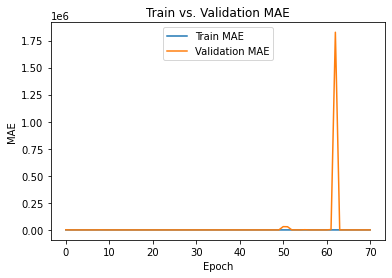

In [17]:
plt.plot(seq2seq.history.history['mae'], label='Train MAE'), 
plt.plot(seq2seq.history.history['val_mae'], label='Validation MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.title('Train vs. Validation MAE')
plt.legend(loc='upper center')
plt.show()

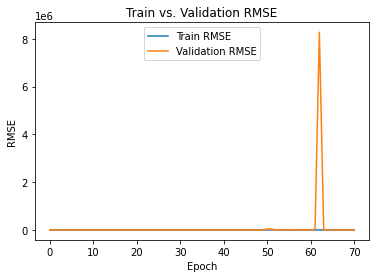

In [18]:
plt.plot(seq2seq.history.history['root_mean_squared_error'], label='Train RMSE'), 
plt.plot(seq2seq.history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('Train vs. Validation RMSE')
plt.legend(loc='upper center')
plt.show()

Example Prediction

In [19]:
pred = seq2seq.predict(test_input_seq)

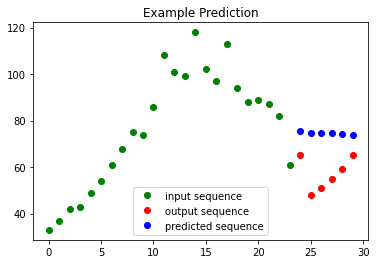

In [20]:
l1, = plt.plot(range(24), input_seq[4].T[0], 'go', label = 'input sequence')
l2, = plt.plot(range(24,30), output_seq[4].T[0], 'ro', label = 'output sequence')
l3, = plt.plot(range(24,30), pred[4].T[0], 'bo', label = 'predicted sequence')
plt.title('Example Prediction')
plt.legend(handles = [l1,l2,l3], loc = 'best')
plt.show()

Prediction 30.12.18 09:00:00

In [21]:
int(seq2seq.predict_next_24hours(data[145:]))

78